DATA PRE-PROCESSING

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import re
import datetime
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.utils import resample

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.decomposition import FactorAnalysis

In [3]:
data = pd.read_csv("/content/labeled_loan_data.csv",low_memory = False)

In [4]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [5]:
data.shape

(266457, 28)

In [6]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanSeqNum', 'LoanPurpose',
       'OrigLoanTerm', 'NumBorrowers', 'SellerName', 'ServicerName',
       'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266457 entries, 0 to 266456
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CreditScore         266457 non-null  int64  
 1   FirstPaymentDate    266457 non-null  int64  
 2   FirstTimeHomebuyer  266457 non-null  object 
 3   MaturityDate        266457 non-null  int64  
 4   MSA                 266457 non-null  object 
 5   MIP                 266457 non-null  int64  
 6   Units               266457 non-null  int64  
 7   Occupancy           266457 non-null  object 
 8   OCLTV               266457 non-null  int64  
 9   DTI                 266457 non-null  int64  
 10  OrigUPB             266457 non-null  int64  
 11  LTV                 266457 non-null  int64  
 12  OrigInterestRate    266457 non-null  float64
 13  Channel             266457 non-null  object 
 14  PPM                 266457 non-null  object 
 15  ProductType         266457 non-nul

In [8]:
data.describe(include='all')

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,266457.000000,266457.000000,266457,266457.000000,266457,266457.000000,266457.000000,266457,266457.000000,266457.000000,...,266457,266457,266457,266457.000000,266457,266457,266457,266457.000000,266457.000000,266457.000000
unique,NaN,NaN,3,NaN,392,NaN,NaN,3,NaN,NaN,...,890,266457,3,NaN,3,20,20,NaN,NaN,NaN
top,NaN,NaN,N,NaN,X,NaN,NaN,O,NaN,NaN,...,94500,F199Q1268030,P,NaN,2,Ot,Other servicers,NaN,NaN,NaN
freq,NaN,NaN,171929,NaN,36460,NaN,NaN,252566,NaN,NaN,...,3579,1,111720,NaN,172032,76943,62176,NaN,NaN,NaN
mean,708.915097,199904.784701,NaN,202902.327216,NaN,9.121085,1.025907,NaN,76.883970,30.038708,...,NaN,NaN,NaN,359.826565,NaN,NaN,NaN,0.198212,1.831083,60.637994
std,68.301151,14.323051,NaN,16.416401,NaN,12.619794,0.202276,NaN,15.192873,13.338958,...,NaN,NaN,NaN,2.354774,NaN,NaN,NaN,0.398654,8.760016,45.773241
min,0.000000,199901.000000,NaN,202402.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,301.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,NaN,202902.000000,NaN,0.000000,1.000000,NaN,70.000000,22.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,35.000000
50%,717.000000,199904.000000,NaN,202903.000000,NaN,0.000000,1.000000,NaN,80.000000,31.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,NaN,202904.000000,NaN,25.000000,1.000000,NaN,90.000000,39.000000,...,NaN,NaN,NaN,360.000000,NaN,NaN,NaN,0.000000,0.000000,63.000000


In [9]:
data.isnull().any()

CreditScore           False
FirstPaymentDate      False
FirstTimeHomebuyer    False
MaturityDate          False
MSA                   False
MIP                   False
Units                 False
Occupancy             False
OCLTV                 False
DTI                   False
OrigUPB               False
LTV                   False
OrigInterestRate      False
Channel               False
PPM                   False
ProductType           False
PropertyState         False
PropertyType          False
PostalCode            False
LoanSeqNum            False
LoanPurpose           False
OrigLoanTerm          False
NumBorrowers          False
SellerName            False
ServicerName          False
EverDelinquent        False
MonthsDelinquent      False
MonthsInRepayment     False
dtype: bool

In [10]:
data.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [11]:
# Replacing the nan user names with unknown user
data["SellerName"]=data["SellerName"].fillna("Unknown User")

In [12]:
data.isnull().sum()

CreditScore           0
FirstPaymentDate      0
FirstTimeHomebuyer    0
MaturityDate          0
MSA                   0
MIP                   0
Units                 0
Occupancy             0
OCLTV                 0
DTI                   0
OrigUPB               0
LTV                   0
OrigInterestRate      0
Channel               0
PPM                   0
ProductType           0
PropertyState         0
PropertyType          0
PostalCode            0
LoanSeqNum            0
LoanPurpose           0
OrigLoanTerm          0
NumBorrowers          0
SellerName            0
ServicerName          0
EverDelinquent        0
MonthsDelinquent      0
MonthsInRepayment     0
dtype: int64

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data.shape

(266457, 28)

In [15]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [16]:
data.dtypes

CreditScore             int64
FirstPaymentDate        int64
FirstTimeHomebuyer     object
MaturityDate            int64
MSA                    object
MIP                     int64
Units                   int64
Occupancy              object
OCLTV                   int64
DTI                     int64
OrigUPB                 int64
LTV                     int64
OrigInterestRate      float64
Channel                object
PPM                    object
ProductType            object
PropertyState          object
PropertyType           object
PostalCode             object
LoanSeqNum             object
LoanPurpose            object
OrigLoanTerm            int64
NumBorrowers           object
SellerName             object
ServicerName           object
EverDelinquent          int64
MonthsDelinquent        int64
MonthsInRepayment       int64
dtype: object

In [17]:
# Data type conversion
data["FirstPaymentDate"]=pd.to_datetime(data["FirstPaymentDate"], format="%Y%m").dt.to_period("M")
data["MaturityDate"]=pd.to_datetime(data["MaturityDate"], format="%Y%m").dt.to_period("M")

In [18]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,1999-02,N,2029-01,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,1999-02,N,2029-01,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,1999-02,N,2029-01,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,1999-02,N,2029-01,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,1999-02,N,2029-01,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54


In [19]:
data["OrigInterestRate"].unique()

array([ 6.75 ,  6.5  ,  6.875,  7.125,  7.   ,  7.25 ,  6.625,  7.75 ,
        7.2  ,  7.5  ,  6.25 ,  7.625,  7.15 ,  7.375,  6.375,  8.75 ,
        7.1  ,  8.5  ,  7.875,  7.05 ,  6.95 ,  8.   ,  6.   ,  8.125,
        8.625,  8.375,  6.125,  5.75 ,  5.875,  7.18 ,  5.125,  8.25 ,
        5.25 ,  8.99 ,  5.625,  9.   ,  9.375,  5.   ,  9.125,  6.99 ,
        5.375,  8.365,  8.875,  8.825,  6.975,  7.3  ,  7.313,  9.625,
        9.5  ,  9.25 ,  7.85 ,  8.695,  4.875,  7.775,  7.29 ,  7.405,
        9.75 ,  7.13 ,  5.99 ,  6.999,  7.055,  7.09 ,  6.785,  7.08 ,
        7.025,  7.7  ,  7.58 , 10.5  ,  7.55 ,  7.445,  9.875,  6.9  ,
        6.85 ,  6.925,  8.37 ,  7.095,  7.19 ,  8.85 ,  7.456,  7.675,
        9.675,  7.475,  8.04 ,  7.4  ,  7.22 ,  7.17 ,  8.7  ,  7.301,
        8.9  , 10.   ,  5.5  ,  6.62 ,  6.7  ,  7.325, 10.375,  4.75 ,
        6.6  ,  7.8  ,  7.333, 10.85 ,  7.185,  7.99 ,  7.245, 11.5  ,
        6.94 ,  6.87 ,  7.65 ,  7.312,  7.28 ,  7.39 ,  7.07 ,  6.55 ,
      

In [20]:
data["OrigInterestRate"].between(0, 25).any()

True

In [21]:
((data["OrigInterestRate"] < 0) | (data["OrigInterestRate"] > 25)).any()

False

In [22]:
data["OrigInterestRate"].describe()

count    266457.000000
mean          6.928868
std           0.346160
min           4.000000
25%           6.750000
50%           6.875000
75%           7.125000
max          12.350000
Name: OrigInterestRate, dtype: float64

In [23]:
data["LoanPurpose"].unique()

array(['P', 'N', 'C'], dtype=object)

In [24]:
(data["LoanPurpose"]=="P").sum()
# Total 123404 of Purchase Loans

111720

In [25]:
data["Channel"].unique()

array(['T', 'R', 'C', 'B'], dtype=object)

DATA VISUALLIZATION [EDA]

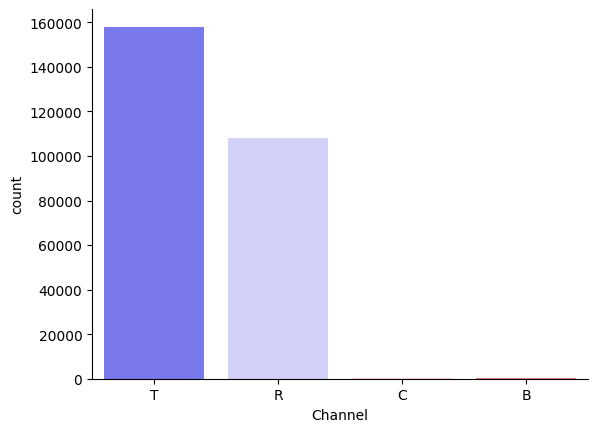

In [33]:
sns.countplot(data=data, x="Channel", palette = 'bwr')
sns.despine()
sns.set = ("dark grid")
plt.show()

In [27]:
data["PPM"].unique()

array(['N', 'X', 'Y'], dtype=object)

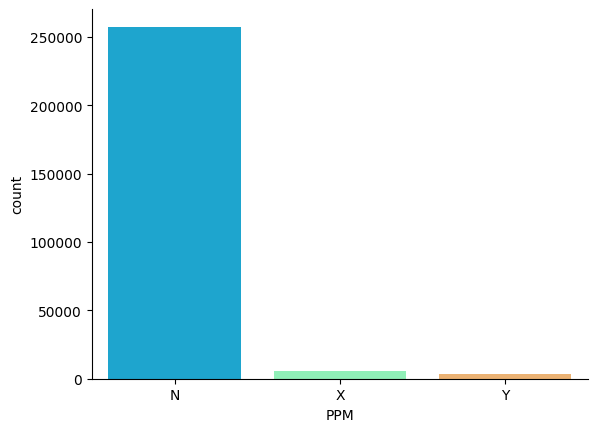

In [34]:
sns.countplot(data = data, x = 'PPM', palette = 'rainbow')
sns.despine()
sns.set = ("dark grid")
plt.show()

In [35]:
data["PropertyState"].unique()

array(['IL', 'CO', 'KS', 'CA', 'NJ', 'WI', 'FL', 'CT', 'GA', 'TX', 'MD',
       'MA', 'SC', 'WY', 'NC', 'AZ', 'IN', 'NY', 'MS', 'WA', 'VA', 'MN',
       'LA', 'OR', 'RI', 'UT', 'MI', 'TN', 'AL', 'MO', 'IA', 'NM', 'NV',
       'VT', 'OH', 'NE', 'PA', 'HI', 'ID', 'AR', 'PR', 'DC', 'GU', 'KY',
       'NH', 'SD', 'ME', 'MT', 'OK', 'WV', 'DE', 'ND', 'AK'], dtype=object)

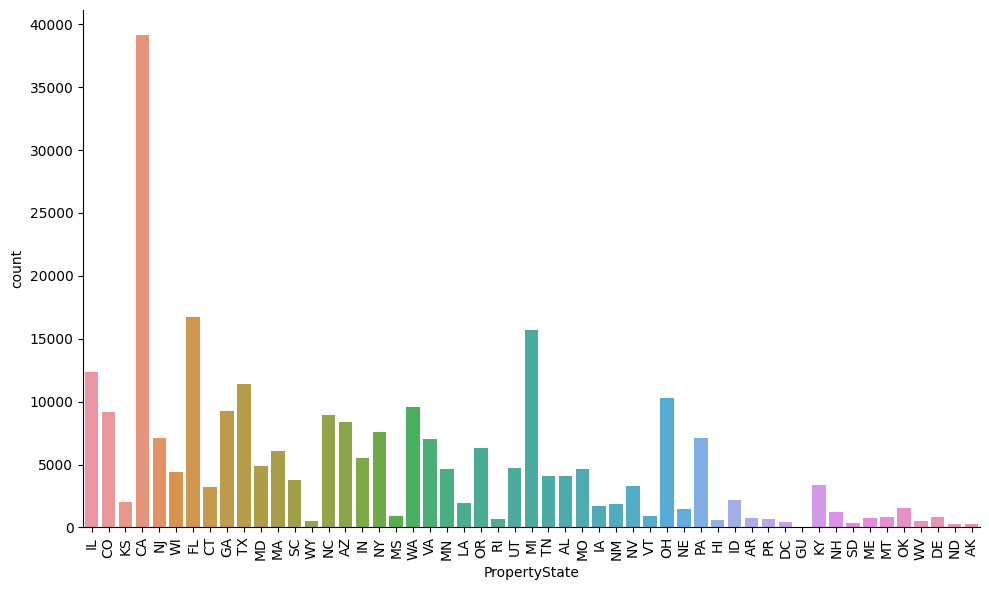

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='PropertyState')
plt.xticks(rotation=90)
plt.tight_layout()
sns.despine()
sns.set = ("dark grid")
plt.show()
# There are highest loans from california

In [37]:
data["PropertyType"].unique()

array(['SF', 'PU', 'CO', 'MH', 'CP', 'LH', 'X '], dtype=object)

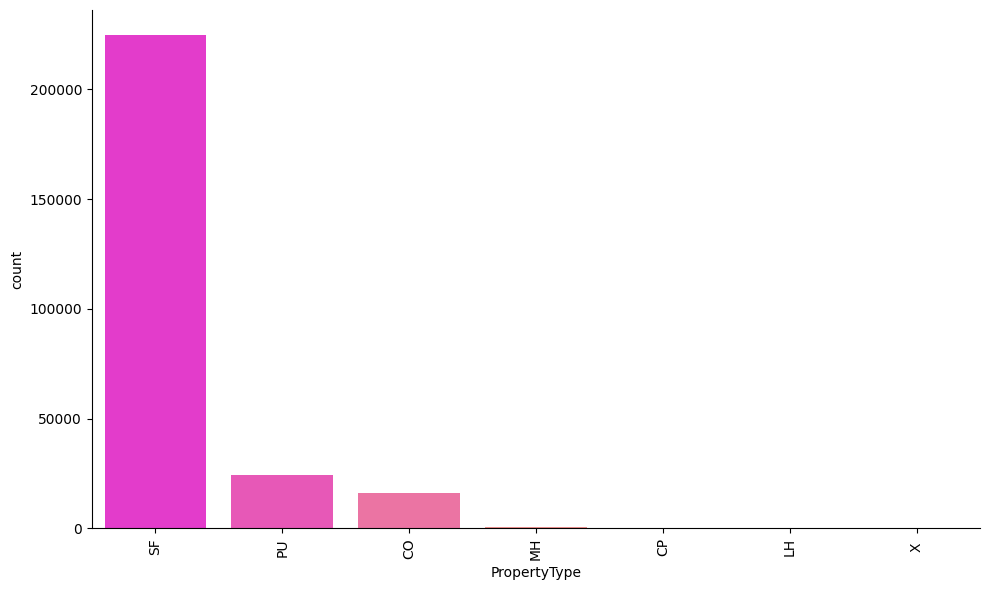

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='PropertyType', palette = 'spring')
plt.xticks(rotation=90)
plt.tight_layout()
sns.despine()
sns.set = ("dark grid")
plt.show()
#Single family homes are dominant

In [39]:
data["LoanPurpose"].unique()

array(['P', 'N', 'C'], dtype=object)

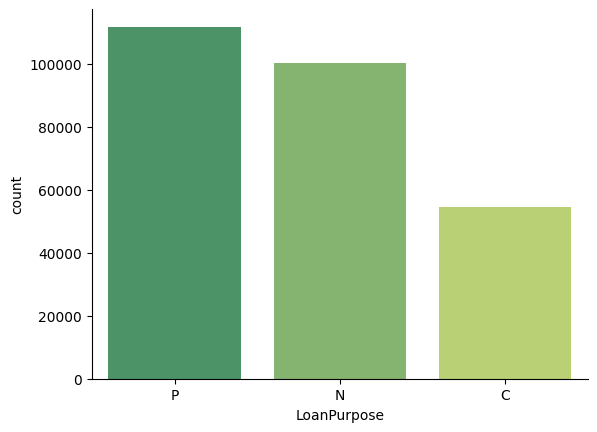

In [44]:
sns.countplot(data=data, x='LoanPurpose', palette = 'summer')
sns.despine()
sns.set = ("dark grid")
plt.show()

# Purchase loans are dominant compared to Refinance Loan and cash out Refinance Loan

In [46]:
data["NumBorrowers"].unique()

array(['2', '1', 'X '], dtype=object)

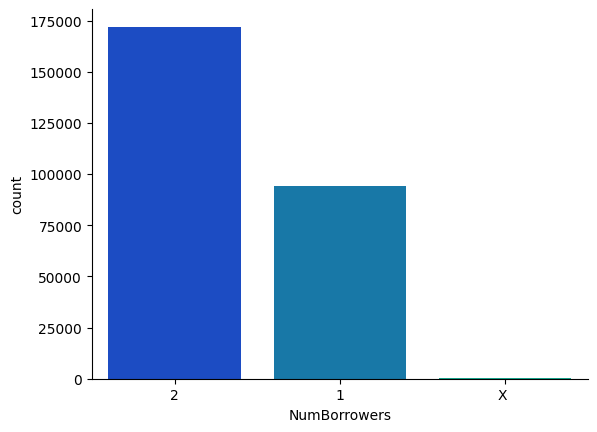

In [47]:
sns.countplot(data=data, x='NumBorrowers', palette ='winter')
sns.despine()
sns.set = ("dark grid")
plt.show()

# The loans associated with 2 borrowers are higher in number

In [48]:
data["EverDelinquent"].unique()

array([0, 1])

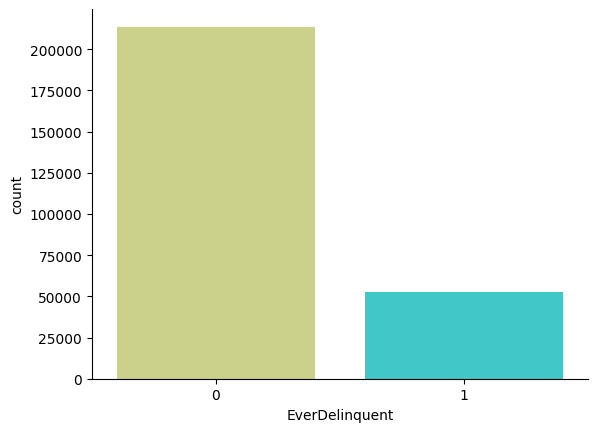

In [49]:
sns.countplot(data=data, x="EverDelinquent", palette = 'rainbow_r')
sns.despine()
sns.set = ("dark grid")
plt.show()
# Higher proportion of 0's indicate lower credit risk

In [50]:
data.set_index("LoanSeqNum",inplace=True)
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,16974,25,1,O,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,N,2029-01,19740,0,1,O,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,N,2029-01,29940,0,1,O,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,N,2029-01,31084,0,1,O,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,N,2029-01,35644,0,1,O,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [69]:
# Histograms for all Numeric columns
categorical_columns = ['FirstTimeHomebuyer', 'MSA', 'Occupancy', 'Channel', 'PPM', 'ProductType',
                       'PropertyState', 'PropertyType', 'PostalCode', 'LoanPurpose', 'NumBorrowers',
                       'SellerName', 'ServicerName']

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[col])
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [71]:
data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

<ipython-input-76-498722b69c6a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='CreditScore', y='OrigInterestRate', data=data, palette = 'bwr')


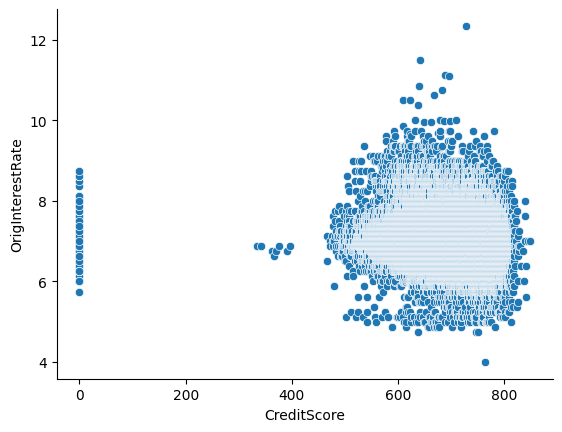

Text(0.5, 0, 'CreditScore')

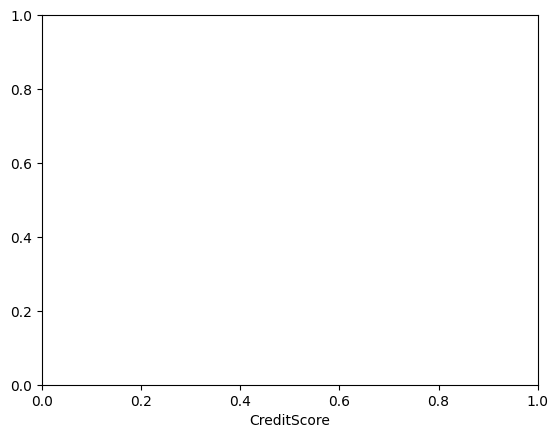

In [76]:
# # Scatter Plot
sns.scatterplot(x='CreditScore', y='OrigInterestRate', data=data, palette = 'bwr')
sns.despine()
plt.show()
# plt.title('Scatter Plot - CreditScore vs. OrigInterestRate')
plt.xlabel('CreditScore')
# # plt.ylabel('OrigInterestRate')
# plt.show()


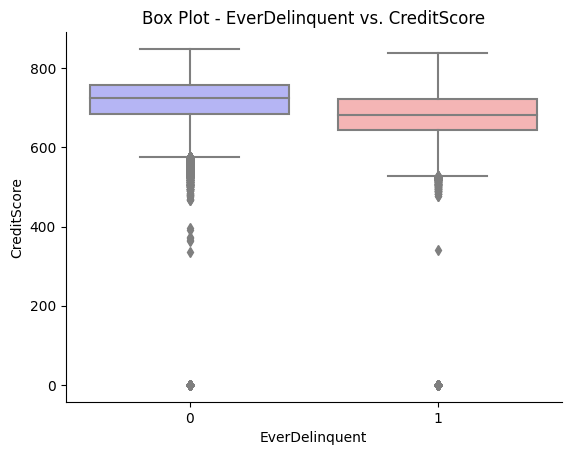

In [78]:
# Bivariate Analysis - Box Plot
sns.boxplot(x='EverDelinquent', y='CreditScore', data=data, palette = 'bwr')
plt.title('Box Plot - EverDelinquent vs. CreditScore')
plt.xlabel('EverDelinquent')
plt.ylabel('CreditScore')
sns.despine()
plt.show()

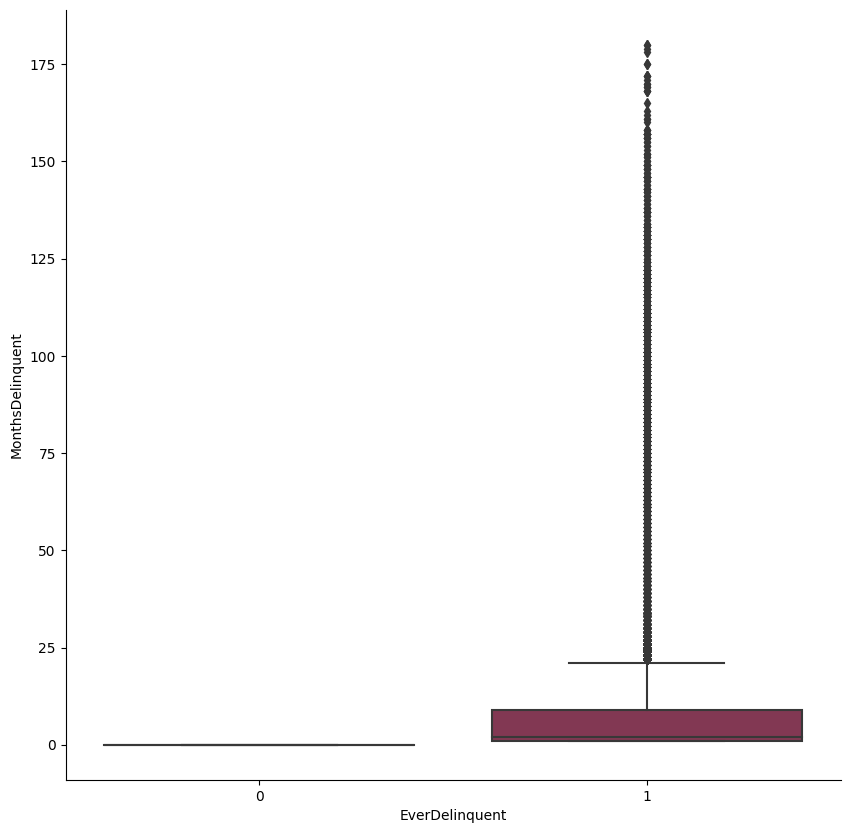

In [81]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='EverDelinquent', y='MonthsDelinquent', data=data, palette = 'twilight')
sns.despine()
plt.show()

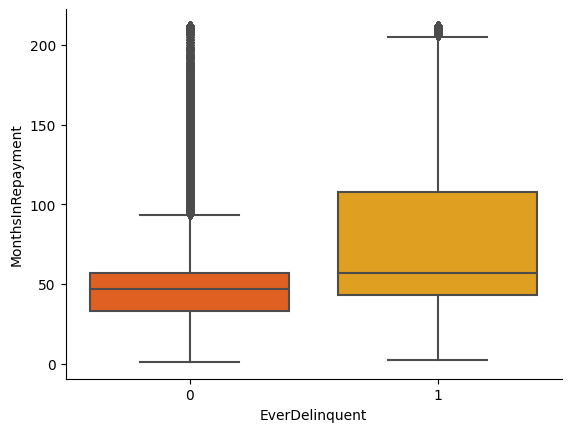

In [82]:
sns.boxplot(x='EverDelinquent', y='MonthsInRepayment', data=data, palette = 'autumn')
sns.despine()
plt.show()

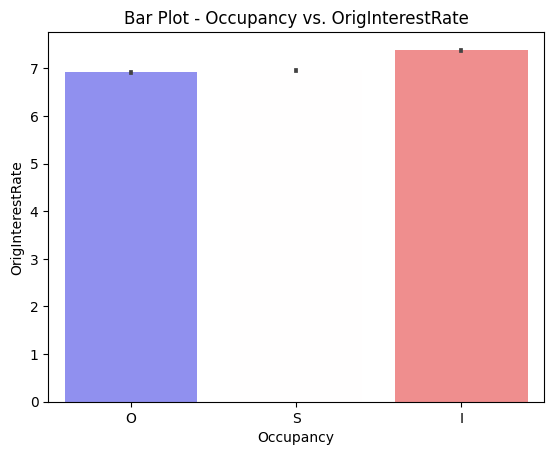

In [85]:
# Bivariate Analysis - Bar Plot
sns.barplot(x='Occupancy', y='OrigInterestRate', data=data, palette = 'bwr')
plt.title('Bar Plot - Occupancy vs. OrigInterestRate')
plt.xlabel('Occupancy')
plt.ylabel('OrigInterestRate')
plt.show()
sns.despine()

<ipython-input-84-93d1e93bdb5f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


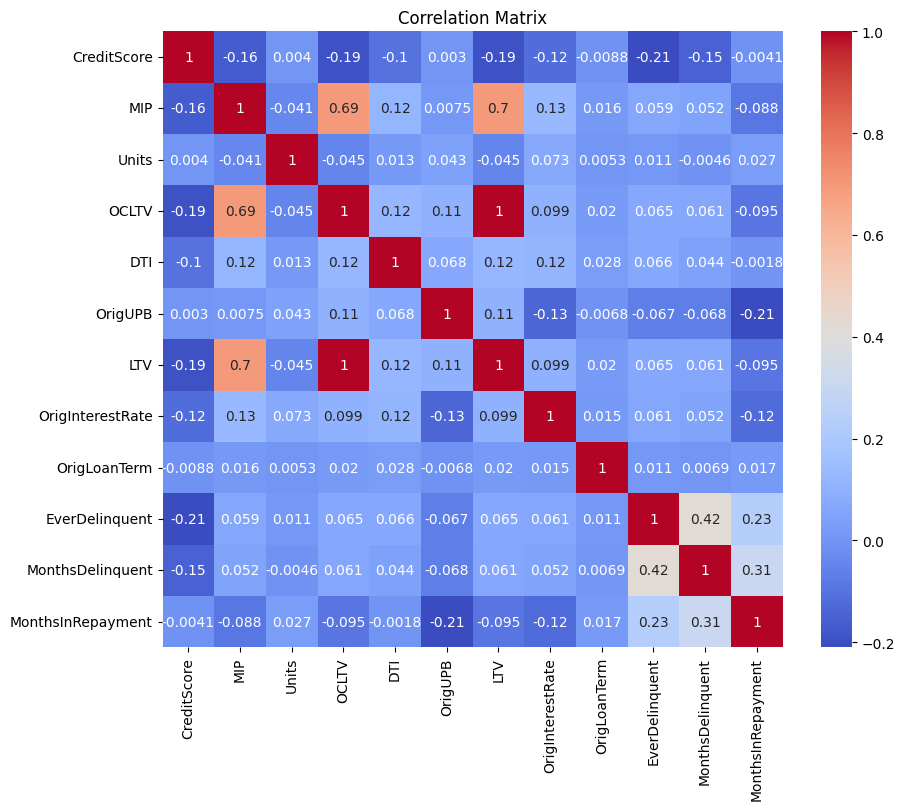

<Figure size 640x480 with 0 Axes>

In [84]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
sns.despine()

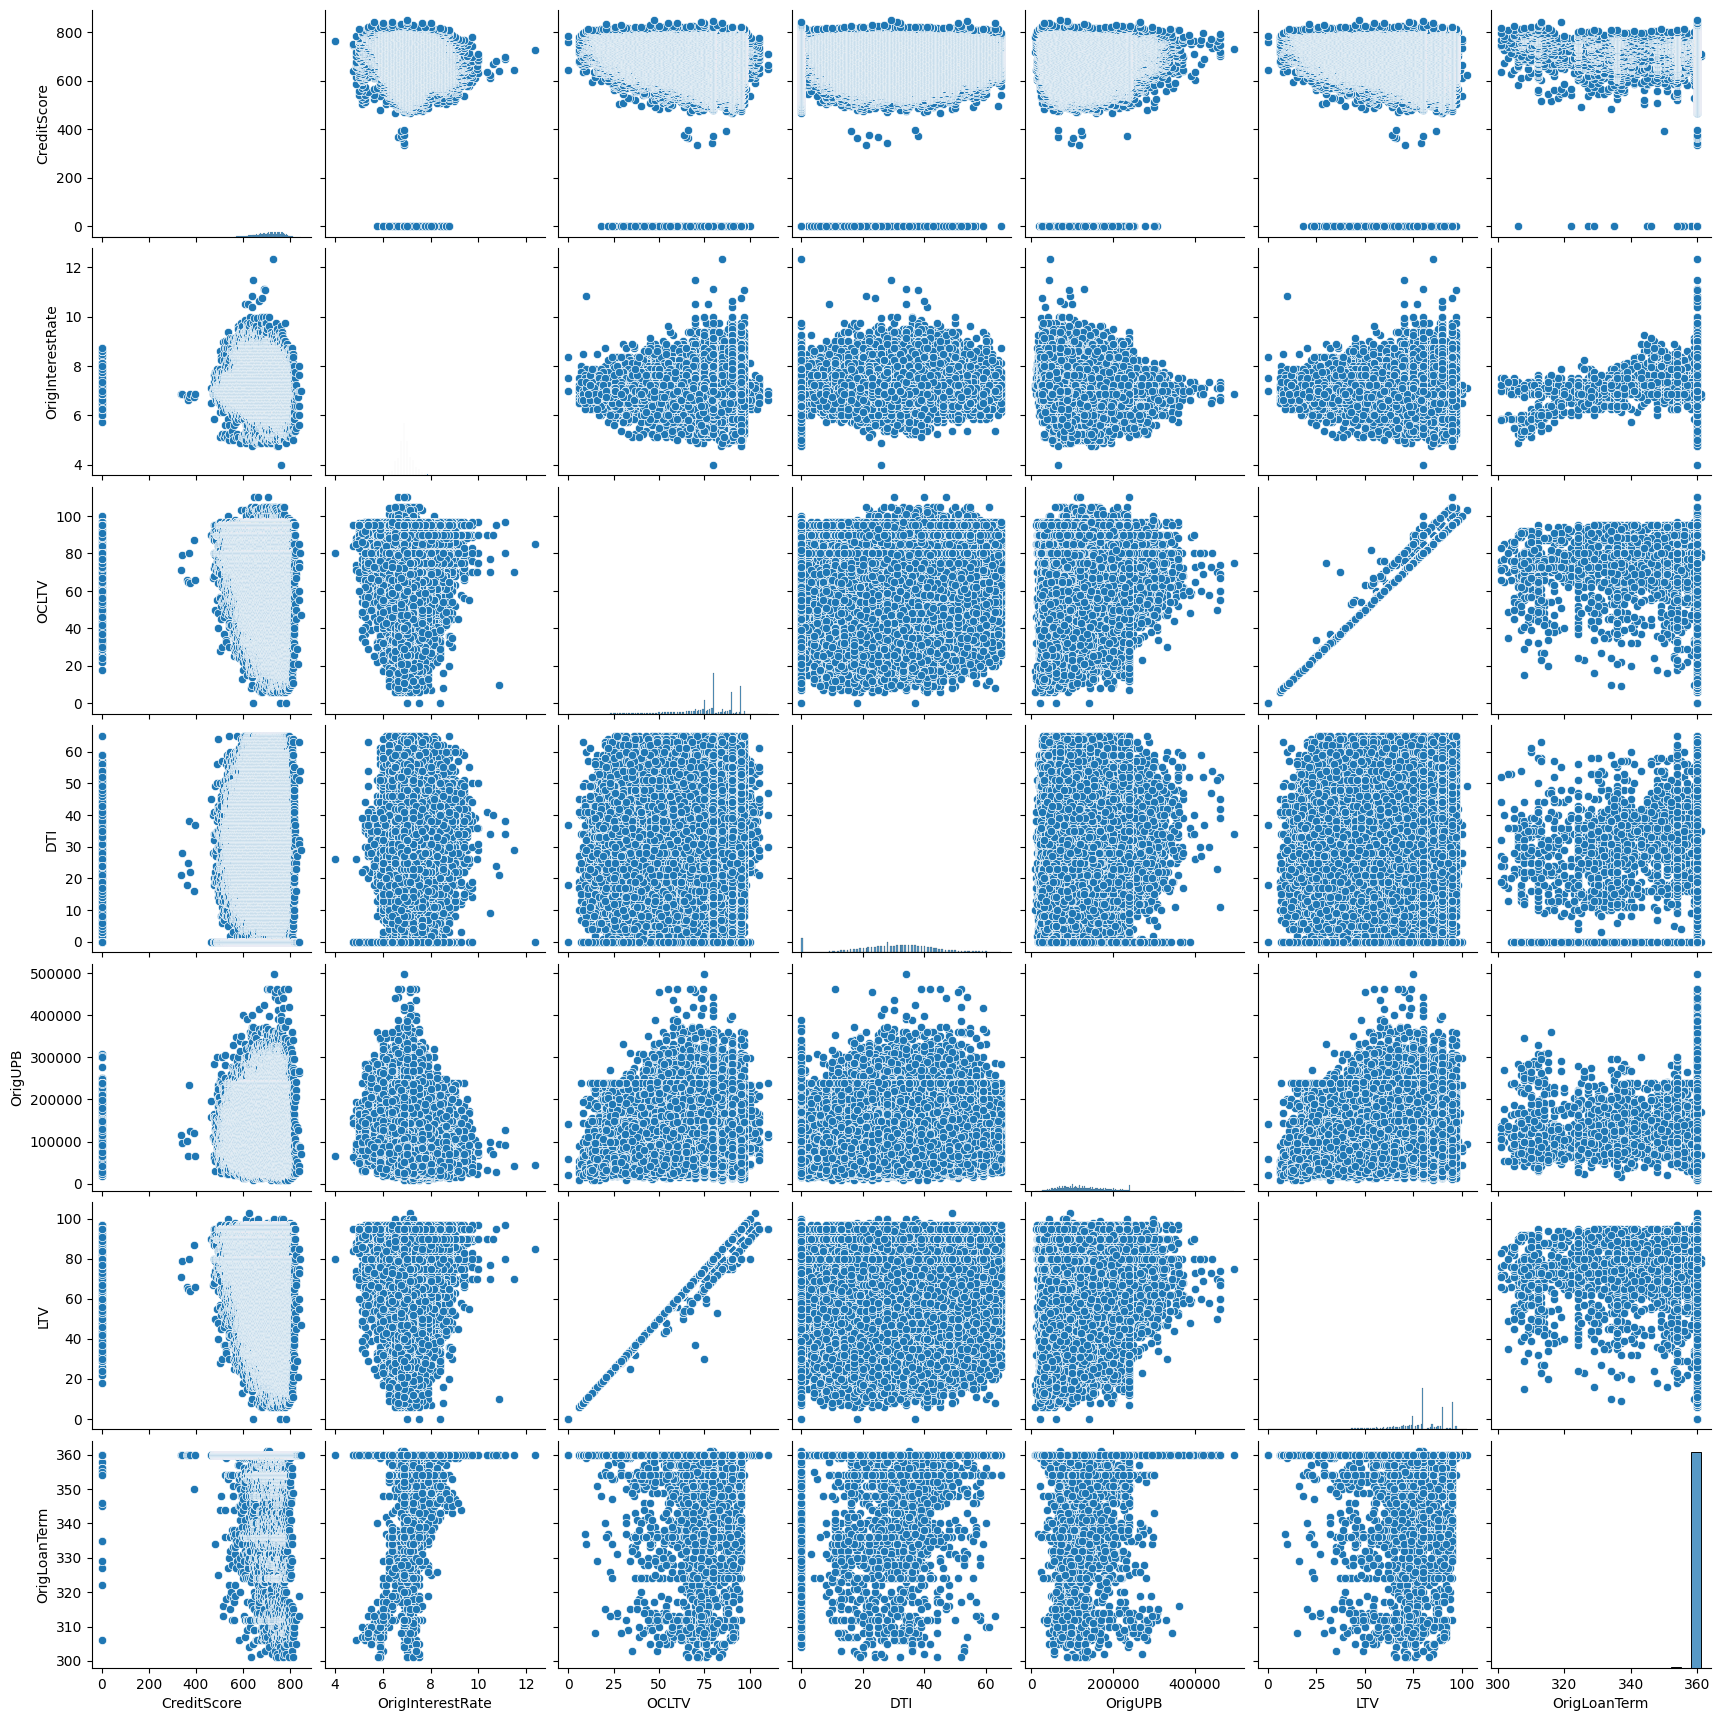

In [90]:
numeric_columns = ['CreditScore', 'OrigInterestRate', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigLoanTerm']
sns.pairplot(data[numeric_columns])
plt.show()

In [91]:
# transform discrete column to categoricsl -->specific cs score range poor, fair,good,excellent --> create with ranges
# Finanace doesnot work on discrete data (CSV)
# LTV(Low,med,high) must be of 3 ranges , FTHB (Firsttimehome buyer) contains 3 values X CONVERT THIS x To numerical and then u can drop it.
# MONTHSINREPAYMENT --> Also contains discrete variables, (total num of emi's in single loan) p-p --> if this has some 20years of time means it contains 240 emi's, in this can we make some range .create 5 labels in form of yearly basis (0--4,4--8,8--12,12--16,16--20)
#                                                          you can drop those columns after creating there transformations

In [92]:
Final_encoded_data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                       int64
MIP                       int64
Units                     int64
Occupancy                 int64
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
PropertyState             int64
PostalCode                int64
LoanPurpose               int64
OrigLoanTerm              int64
NumBorrowers              int64
SellerName                int64
ServicerName              int64
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
Channel_B                 uint8
Channel_C                 uint8
Channel_R                 uint8
Channel_T                 uint8
PPM_N                     uint8
PPM_X                     uint8
PPM_Y                     uint8
PropertyType_CO           uint8
Property

In [93]:
Final_encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,68,25,1,1,89,27,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,0,1999-02,N,2029-01,95,0,1,1,73,17,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,0,1999-02,N,2029-01,198,0,1,1,75,16,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,0,1999-02,N,2029-01,210,0,1,1,76,14,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,0,1999-02,N,2029-01,250,0,1,1,78,18,...,1,0,0,0,0,0,0,0,1,0


In [94]:
data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,16974,25,1,O,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,N,2029-01,19740,0,1,O,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,N,2029-01,29940,0,1,O,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,N,2029-01,31084,0,1,O,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,N,2029-01,35644,0,1,O,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [95]:
data['CreditScore'].value_counts

<bound method IndexOpsMixin.value_counts of LoanSeqNum
F199Q1268030      0
F199Q1015092      0
F199Q1266886      0
F199Q1178167      0
F199Q1178517      0
               ... 
F199Q1220925    839
F199Q1401332    840
F199Q1401282    840
F199Q1220924    845
F199Q1220923    849
Name: CreditScore, Length: 266457, dtype: int64>

DATA ENCODING

In [51]:
data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                      object
MIP                       int64
Units                     int64
Occupancy                object
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
Channel                  object
PPM                      object
ProductType              object
PropertyState            object
PropertyType             object
PostalCode               object
LoanPurpose              object
OrigLoanTerm              int64
NumBorrowers             object
SellerName               object
ServicerName             object
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
dtype: object

In [52]:
# # Total 10 of categorical variables
# FirstTimeHomebuyer --> Ordinal
# MSA --> Ordinal
# Occupancy --> Ordinal
# Channel  --> Nominal
# PPM      --> Nominal
# PropertyType --> Nominal
# PostalCode   --> Ordinal
# LoanPurpose  --> Ordinal
# SellerName --> Ordinal
# ServicerName --> Ordinal
# Label Encosing for all Ordinal data and one hot encoding for all nominal data

In [53]:
encoded_data = data.copy()

In [54]:
encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,16974,25,1,O,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,N,2029-01,19740,0,1,O,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,N,2029-01,29940,0,1,O,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,N,2029-01,31084,0,1,O,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,N,2029-01,35644,0,1,O,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [55]:
label_encoder = LabelEncoder()
encoded_data["Occupancy"] = label_encoder.fit_transform(encoded_data["Occupancy"])
encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,16974,25,1,1,89,27,...,SF,60400,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
F199Q1015092,0,1999-02,N,2029-01,19740,0,1,1,73,17,...,SF,80200,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
F199Q1266886,0,1999-02,N,2029-01,29940,0,1,1,75,16,...,SF,66000,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
F199Q1178167,0,1999-02,N,2029-01,31084,0,1,1,76,14,...,SF,90700,N,360,2,GM,GMACMTGECORP,0,0,35
F199Q1178517,0,1999-02,N,2029-01,35644,0,1,1,78,18,...,SF,7600,N,360,2,GM,GMACMTGECORP,0,0,54


In [56]:
# List of columns to be label encoded
le = LabelEncoder()
columns_to_encode = ['PostalCode','MSA', 'LoanPurpose', 'SellerName','ServicerName','PropertyState',]

# Apply label encoding to train data
for column in columns_to_encode:
    encoded_data[column] = le.fit_transform(encoded_data[column])

In [57]:
encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PropertyType,PostalCode,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,68,25,1,1,89,27,...,SF,520,2,360,2,7,17,0,0,52
F199Q1015092,0,1999-02,N,2029-01,95,0,1,1,73,17,...,SF,716,1,360,1,8,3,0,0,144
F199Q1266886,0,1999-02,N,2029-01,198,0,1,1,75,16,...,SF,576,1,360,2,7,17,0,0,67
F199Q1178167,0,1999-02,N,2029-01,210,0,1,1,76,14,...,SF,805,1,360,2,10,10,0,0,35
F199Q1178517,0,1999-02,N,2029-01,250,0,1,1,78,18,...,SF,671,1,360,2,10,10,0,0,54


In [58]:
encoded_data.columns

Index(['CreditScore', 'FirstPaymentDate', 'FirstTimeHomebuyer', 'MaturityDate',
       'MSA', 'MIP', 'Units', 'Occupancy', 'OCLTV', 'DTI', 'OrigUPB', 'LTV',
       'OrigInterestRate', 'Channel', 'PPM', 'ProductType', 'PropertyState',
       'PropertyType', 'PostalCode', 'LoanPurpose', 'OrigLoanTerm',
       'NumBorrowers', 'SellerName', 'ServicerName', 'EverDelinquent',
       'MonthsDelinquent', 'MonthsInRepayment'],
      dtype='object')

In [59]:
# Onehot encoding
Final_encoded_data = pd.get_dummies(encoded_data, columns=['Channel', 'PPM', 'PropertyType'])

In [60]:
Final_encoded_data.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PPM_N,PPM_X,PPM_Y,PropertyType_CO,PropertyType_CP,PropertyType_LH,PropertyType_MH,PropertyType_PU,PropertyType_SF,PropertyType_X
LoanSeqNum,,,,,,,,,,,,,,,,,,,,,
F199Q1268030,0,1999-02,N,2029-01,68,25,1,1,89,27,...,1,0,0,0,0,0,0,0,1,0
F199Q1015092,0,1999-02,N,2029-01,95,0,1,1,73,17,...,1,0,0,0,0,0,0,0,1,0
F199Q1266886,0,1999-02,N,2029-01,198,0,1,1,75,16,...,1,0,0,0,0,0,0,0,1,0
F199Q1178167,0,1999-02,N,2029-01,210,0,1,1,76,14,...,1,0,0,0,0,0,0,0,1,0
F199Q1178517,0,1999-02,N,2029-01,250,0,1,1,78,18,...,1,0,0,0,0,0,0,0,1,0


In [61]:
Final_encoded_data.drop("ProductType",axis = 1,inplace = True)


In [62]:
Final_encoded_data["NumBorrowers"] = Final_encoded_data["NumBorrowers"].replace("X ", 99)

In [63]:
Final_encoded_data["NumBorrowers"] = Final_encoded_data["NumBorrowers"].astype(int)

In [64]:
Final_encoded_data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                       int64
MIP                       int64
Units                     int64
Occupancy                 int64
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
PropertyState             int64
PostalCode                int64
LoanPurpose               int64
OrigLoanTerm              int64
NumBorrowers              int64
SellerName                int64
ServicerName              int64
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
Channel_B                 uint8
Channel_C                 uint8
Channel_R                 uint8
Channel_T                 uint8
PPM_N                     uint8
PPM_X                     uint8
PPM_Y                     uint8
PropertyType_CO           uint8
Property

In [65]:
data.dtypes

CreditScore               int64
FirstPaymentDate      period[M]
FirstTimeHomebuyer       object
MaturityDate          period[M]
MSA                      object
MIP                       int64
Units                     int64
Occupancy                object
OCLTV                     int64
DTI                       int64
OrigUPB                   int64
LTV                       int64
OrigInterestRate        float64
Channel                  object
PPM                      object
ProductType              object
PropertyState            object
PropertyType             object
PostalCode               object
LoanPurpose              object
OrigLoanTerm              int64
NumBorrowers             object
SellerName               object
ServicerName             object
EverDelinquent            int64
MonthsDelinquent          int64
MonthsInRepayment         int64
dtype: object